<a href="https://colab.research.google.com/github/sjnaj/DeepLearning/blob/master/Basic/LBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

原始图片


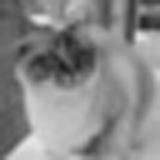

LBP_Origin：


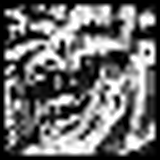

LBP_Uniform：


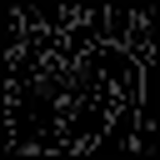

In [78]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv


def LBP_Origin(src):
    dst = np.zeros(src.shape,dtype = src.dtype)
    for row in range(1,src.shape[0]-1):#保证rol，col不在边缘
        for col in range(1,src.shape[1]-1):
            center = src[row,col]
            LBPtemp = 0
              #旋转遍历获得二进制编码
            LBPtemp |= (src[row-1,col-1] >= center) << 7
            LBPtemp |= (src[row-1,col  ] >= center) << 6
            LBPtemp |= (src[row-1,col+1] >= center) << 5
            LBPtemp |= (src[row  ,col-1] >= center) << 4
            LBPtemp |= (src[row  ,col+1] >= center) << 3
            LBPtemp |= (src[row+1,col-1] >= center) << 2
            LBPtemp |= (src[row+1,col  ] >= center) << 1
            LBPtemp |= (src[row+1,col+1] >= center) << 0
            #替换
            dst[row,col] = LBPtemp

    return dst
def LBP_Uniform(src):
  #构造编码表(59种：0-58)
  tmp=1
  table=np.zeros((256,1))
  for i in range(0,256):
    if(get_hop_times(i)<3):#否则为默认的0
      table[i]=tmp
      tmp+=1
  
  dst=np.zeros(src.shape,dtype=src.dtype)
  for row in range(0,src.shape[0]):#不用避开边缘
     for col in range(0,src.shape[1]):
          dst[row,col]=table[src[row,col]]#替换为table里的值
  
  return dst

def get_hop_times(n):#获取编码跳变次数
  cnt=0
  bits='{:0>8}'.format(str(bin(n))[2:])#转为8位二进制串
  for i in range(0,8):
    if bits[i]!=bits[(i+1)%8]:#跳变一次
      cnt+=1
  return cnt

src_ori = cv.imread("/content/drive/MyDrive/Colab Notebooks/image/query (1).png")
src = cv.cvtColor(src_ori,cv.COLOR_BGR2GRAY)#默认的BGR读取换成灰度
dst = LBP_Origin(src)
# cv.imwrite("lbp.jpg",dst)
dst_uniform=LBP_Uniform(dst)
# cv.imwrite("lbp_uniform.jpg",dst_uniform)

# cv.imshow('image',dst)#cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
from google.colab.patches import cv2_imshow
#放大图片
print("原始图片")
cv2_imshow(cv.resize(src, (0, 0), fx=5, fy=5, interpolation=cv.INTER_CUBIC))
print("LBP_Origin：")
cv2_imshow(cv.resize(dst, (0, 0), fx=5, fy=5, interpolation=cv.INTER_CUBIC))
print("LBP_Uniform：")
cv2_imshow(cv.resize(dst_uniform, (0, 0), fx=5, fy=5, interpolation=cv.INTER_CUBIC))






